<font size="12">Confusion Matrix Visualization</font>



several variations of cm visualizations  

- normalized cm
- simplest display: cm arrays
- confusion matrices dataframes, side by side
- plot cm
- plot unnorm and norm heatmaps, side by side
- multiple (two and more) cm, in two colum




# Dependencies

In [1]:
import numpy as np
import os

# Classification metrics
from sklearn.metrics import confusion_matrix 


In [2]:
# Import the script from different folder
import sys  
sys.path.append('./scripts')

import metrics_utilities as mu

# Preparing Data

## Load test target variable

In [3]:
y_test = np.load('./data/y_test.npy')

## Load predictions for all models

In [4]:
# Prepare predictions for our models
pred_dt = np.load('./data/pred_dt.npy')
pred_dl = np.load('./data/pred_dl.npy')
pred_knn = np.load('./data/pred_knn.npy')
pred_lr = np.load('./data/pred_lr.npy')
pred_rf = np.load('./data/pred_rf.npy')
pred_svm = np.load('./data/pred_svm.npy')
pred_xgb = np.load('./data/pred_xgb.npy')


## Create "models - predictions" dictionaries

**Dictionary `'models_pred'`**

We are going to create the dictionary `models_pred` with names of all models and their predictions. We will be using it later for plotting and displaying results of the models.

In [5]:
# Create models_pred dictionary, contains all 7 models
models_pred = {
    'Decision Tree' : pred_dt,
    'Deep Learning' : pred_dl,
    'K-nearest Neighbors' : pred_knn,
    'Logistic Regression' : pred_lr,
    'Random Forest' : pred_rf,
    'SVM' : pred_svm,
    'XGBoost' : pred_xgb
}

In [7]:
# Create models_pred_2 dictionary, contains 2 models
models_pred_2 = {
    'Decision Tree' : pred_dt,
    'Random Forest' : pred_rf
}

## Names of classes

The `target_names` variable holds names of our classes. It will be used later for displaying evaluation results.

In [8]:
# Names of our classes
target_names = ['Stays', 'Exits']

# Confusion Matrix

## Why normalized confusion matrix?

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, pred_dt)
print(cm)

[[1979  410]
 [ 198  413]]


In [10]:
# Normalized confusion matrix
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.83 0.17]
 [0.32 0.68]]


## Helper Functions

For displaying different ++++ we will be using previusly imported script `metrics_utilities`. It is a collection of several functions:

- cm_cr - display unnormalized and normalized confusion matrix dataframes side by side, and classification report 
- plot_cm - plot unnormalized or normalized confusion matrix heatmap
- plot_cm_unnorm_and_norm - one model's confusion matrix heatmaps without and with normalization side by side
- plot_conf_matrices - plot heatmaps for normalized (default) or unnormalized confusion matrices for all models


## Display Confusion Matrix Dataframes Side by Side - `cm_cr`

?????????????????????  

To call this function:  
`mu.cm_cr(model_name, y_test, y_pred, target_names, cr=True)`

<pre>Args:
        model_name: name of the model
        y_test: test target variable
        y_pred: prediction
        target_names: list of target class names
        cr: print classification report if True - default

Returns:
        Display confusion matrix dataframes side by side
        and classification report if selected (default)</pre>

### One model

#### confusion matrix only

In [11]:
mu.cm_cr('Random Forest', y_test, pred_rf, target_names, cr=False)

                       Random Forest


PREDICTED,Stays,Exits
TRUE,,
Stays,2137,252
Exits,233,378
PREDICTED,Stays,Exits
TRUE,,
Stays,0.89,0.11
Exits,0.38,0.62


#### Confusion matrix and classification report

In [12]:
mu.cm_cr('Random Forest', y_test, pred_rf, target_names)

                       Random Forest


PREDICTED,Stays,Exits
TRUE,,
Stays,2137,252
Exits,233,378
PREDICTED,Stays,Exits
TRUE,,
Stays,0.89,0.11
Exits,0.38,0.62



              precision    recall  f1-score   support

       Stays       0.90      0.89      0.90      2389
       Exits       0.60      0.62      0.61       611

    accuracy                           0.84      3000
   macro avg       0.75      0.76      0.75      3000
weighted avg       0.84      0.84      0.84      3000




### Multiple models

In [13]:
# Display classification report and confusion matrix for all models 
#  models_pred_2 dictionary
for model, pred in models_pred_2.items():
    mu.cm_cr(model, y_test, pred, target_names)

                       Decision Tree


PREDICTED,Stays,Exits
TRUE,,
Stays,1979,410
Exits,198,413
PREDICTED,Stays,Exits
TRUE,,
Stays,0.83,0.17
Exits,0.32,0.68



              precision    recall  f1-score   support

       Stays       0.91      0.83      0.87      2389
       Exits       0.50      0.68      0.58       611

    accuracy                           0.80      3000
   macro avg       0.71      0.75      0.72      3000
weighted avg       0.83      0.80      0.81      3000


                       Random Forest


PREDICTED,Stays,Exits
TRUE,,
Stays,2137,252
Exits,233,378
PREDICTED,Stays,Exits
TRUE,,
Stays,0.89,0.11
Exits,0.38,0.62



              precision    recall  f1-score   support

       Stays       0.90      0.89      0.90      2389
       Exits       0.60      0.62      0.61       611

    accuracy                           0.84      3000
   macro avg       0.75      0.76      0.75      3000
weighted avg       0.84      0.84      0.84      3000




## Plot confusion matrix heatmaps for one model - `plot_cm`

?????????????????????????  

Args:
        model_name: name of the model
        y_test: test target variable
        y_pred: prediction
        target_names: list of target class names
        color: color palette
        norm: plot normalized matrix if True - default 
              plot unnormalized matrix if False

    Returns:
        Plot one model's confusion matrix,
         normalized (default) or unnormalized
    """

### Unnormalized matrix

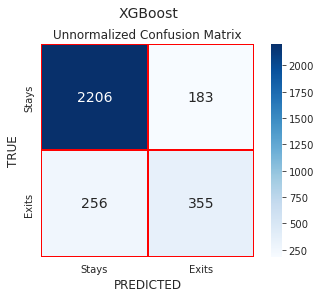

In [14]:
mu.plot_cm('XGBoost', y_test, pred_xgb, target_names, "Blues", norm=False)

### Normalized matrix

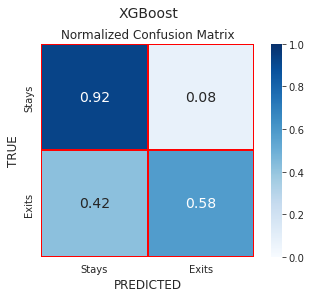

In [15]:
mu.plot_cm('XGBoost', y_test, pred_xgb, target_names, "Blues", norm=True)

## Unnormalized and normalized confusion matrix heatmaps side by side - `plot_cm_unnorm_and_norm`

????????????????????????????  

Args:
        model_name: name of the model
        y_test: test target variable
        y_pred: prediction
        target_names: list of target class names
        color: color palette

    Returns:
        Plot one model's confusion matrix heatmaps side by side
        left unnormalized and right normalized

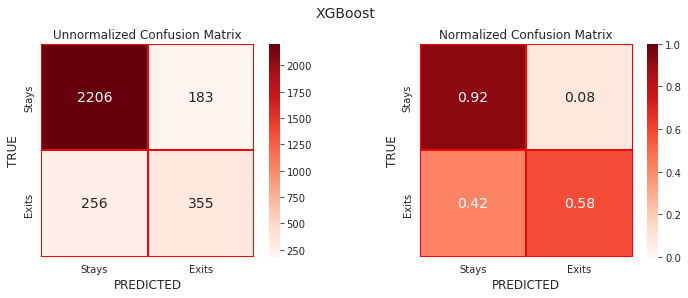

In [16]:
# Plot confusion matrix and its normalized version.
mu.plot_cm_unnorm_and_norm('XGBoost', y_test, pred_xgb, target_names, 'Reds')

## Confusion Matrix Heatmaps for Multiple Models - `plot_conf_matrices`

????????????????????????????   

multiple >2

Args:
        models_pred: dictionary with model names as keys and predictions as values 
        y_test: test target variable
        target_names: list of target class names
        color: color palette
        norm: plot normalized matrices if True - default 
              plot unnormalized matrices if False

    Returns:
        Plot all model's confusion matrix heatmaps, 2 per row,
        normalized (default) or unnormalized

=========   
2 columns  
==============


### Two Models - Normalized Connfusion Matrices

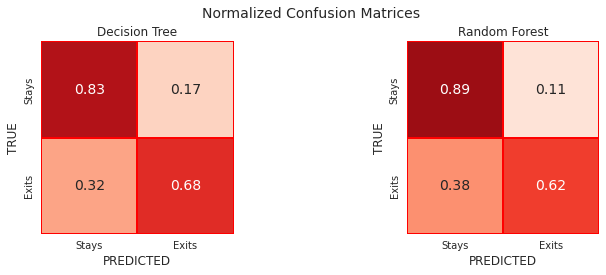

In [17]:
# Plot all confusion matrices 
mu.plot_conf_matrices(models_pred_2, y_test, target_names, 'Reds')

### Two Models - Unnormalized Confusion Matrices

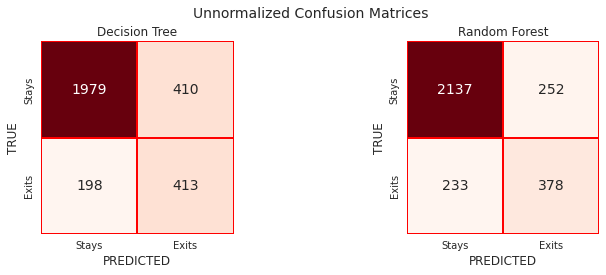

In [18]:
# Plot all confusion matrices 
mu.plot_conf_matrices(models_pred_2, y_test, target_names, 'Reds', norm=False)

### All models

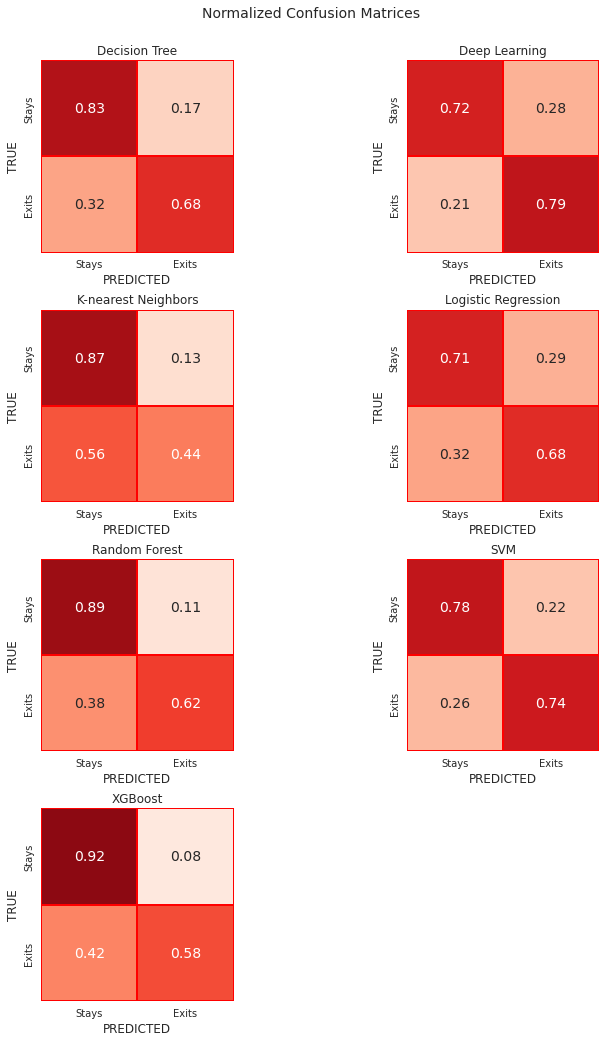

In [19]:
# Plot all confusion matrices 
mu.plot_conf_matrices(models_pred, y_test, target_names, 'Reds')

**NOTE:**  

- in matplotlib >3.5.2 `dpi` default value was changed from 72 to 100
- deafult `figsize` was also changed: 6.0, 4.0 &rarr; 6.4, 4.8
- in our functions we used `dpi=72` and `figsize=(6.0, 4.0)`
